In [1]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt

In [29]:
fitness = mlrose.FourPeaks(t_pct=0.2)

In [33]:
problem = mlrose.DiscreteOpt(length = 10, fitness_fn = fitness, maximize = True, max_val = 2)

## SA

In [36]:
# Define decay schedule
schedule = mlrose.ArithDecay(init_temp=1,decay=0.01)

# Define initial state
init_state = np.array([1,1,1,0,1,0,0,1,0,0])

max_atempts_list = [10,50,100]
max_iters_list = [1000]

fitness_curve_dict_sa = {}
best_fitness_dict_sa = {}
for max_attempt in max_atempts_list:
    for max_iter in max_iters_list:
        best_state, best_fitness, fitness_curve = \
            mlrose.simulated_annealing(problem=problem, 
                                       schedule=schedule,
                                       max_attempts=max_attempt, 
#                                        max_iters=max_iter,
                                       init_state=init_state,
                                       random_state=1,
                                       curve=True)
        key = 'max attempt: {}, best fitness score: {}'.format(max_attempt, best_fitness)
        fitness_curve_dict_sa[key] = fitness_curve
        best_fitness_dict_sa[key] = best_fitness

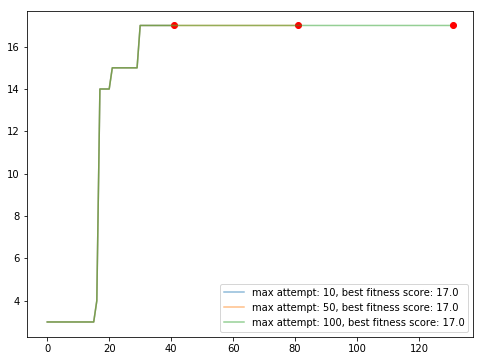

In [37]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_sa.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()

## RHC

In [62]:
max_atempts_list = [10,50,100] # list(range(10,50,10))
max_iters_list = [1000]

fitness_curve_dict_rhc = {}
best_fitness_dict_rhc = {}
for max_attempt in max_atempts_list:
    for max_iter in max_iters_list:
        best_state, best_fitness, fitness_curve = \
            mlrose.random_hill_climb(problem=problem,
                                    max_attempts=max_attempt,
                                    max_iters=max_iter,
                                    curve=True,
                                    random_state=1,
                                    restarts=1)
        key = 'max attempt: {}, best fitness score: {}'.format(max_attempt, best_fitness)
        fitness_curve_dict_rhc[key] = fitness_curve
        best_fitness_dict_rhc[key] = best_fitness

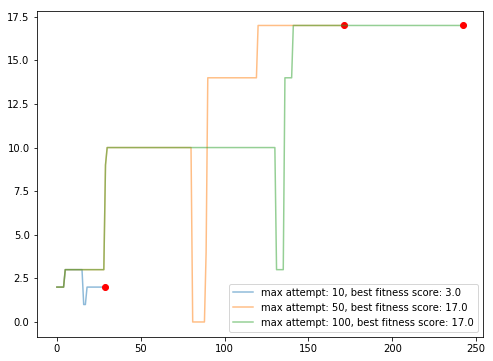

In [63]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_rhc.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()

## GA

In [46]:
pop_size_list = [10,200] # list(range(10,200,50))
mutation_prob_list = [0.1,0.5]#[0.01,0.1,0.5]
max_attempt_list = [10,100]

fitness_curve_dict_ga = {}
best_fitness_dict_ga = {}
for max_attempt in max_attempt_list:
    for pop_size in pop_size_list:
        for mutation_prob in mutation_prob_list:
            best_state, best_fitness, fitness_curve = \
                mlrose.genetic_alg(problem=problem,
                                        pop_size=pop_size,
                                        mutation_prob=mutation_prob,
                                        max_attempts=max_attempt,
                                        curve=True,
                                        random_state=1,
                                        )
            key = 'max attempt: {}, pop size: {}, mutaton prob: {}, best fitness score: {}'.format(max_attempt, pop_size, mutation_prob, best_fitness)
            fitness_curve_dict_ga[key] = fitness_curve
            best_fitness_dict_ga[key] = best_fitness

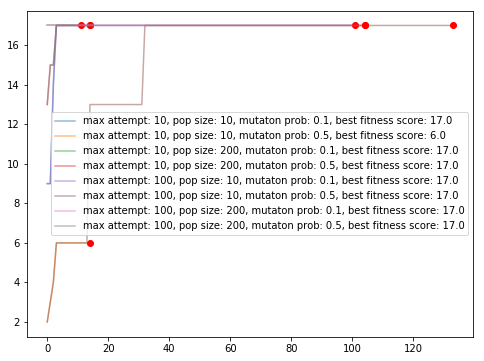

In [47]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_ga.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()

## MIMIC

In [49]:
pop_size_list = [10,200] # list(range(10,200,50))
keep_pct_list = [0.1,0.3]
max_attempt_list = [10,100]

fitness_curve_dict_mimic = {}
best_fitness_dict_mimic = {}
for max_attempt in max_attempt_list:
    for pop_size in pop_size_list:
        for keep_pct in keep_pct_list:
            best_state, best_fitness, fitness_curve = \
                mlrose.mimic(problem=problem,
                                        pop_size=pop_size,
                                        keep_pct=keep_pct,
                                        max_attempts=max_attempt,
                                        curve=True,
                                        random_state=1,
                                        )
            key = 'max_attempt: {}, pop size: {}, keep pct: {}, best fitness score: {}'.format(max_attempt, pop_size, keep_pct, best_fitness)
            fitness_curve_dict_mimic[key] = fitness_curve
            best_fitness_dict_mimic[key] = best_fitness

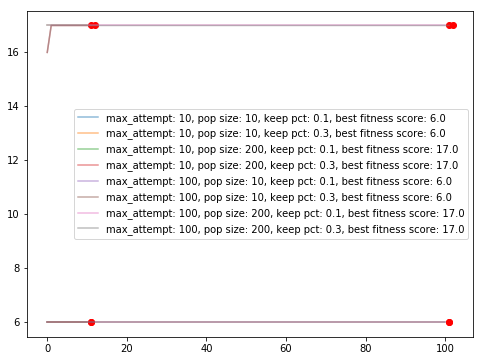

In [50]:
plt.figure(figsize=(8,6))
for key, val in fitness_curve_dict_mimic.items():
    plt.plot(val, label=key, alpha=0.5)
    plt.plot(len(val), val[-1], 'or')
plt.legend()
plt.show()